# Linear Regression

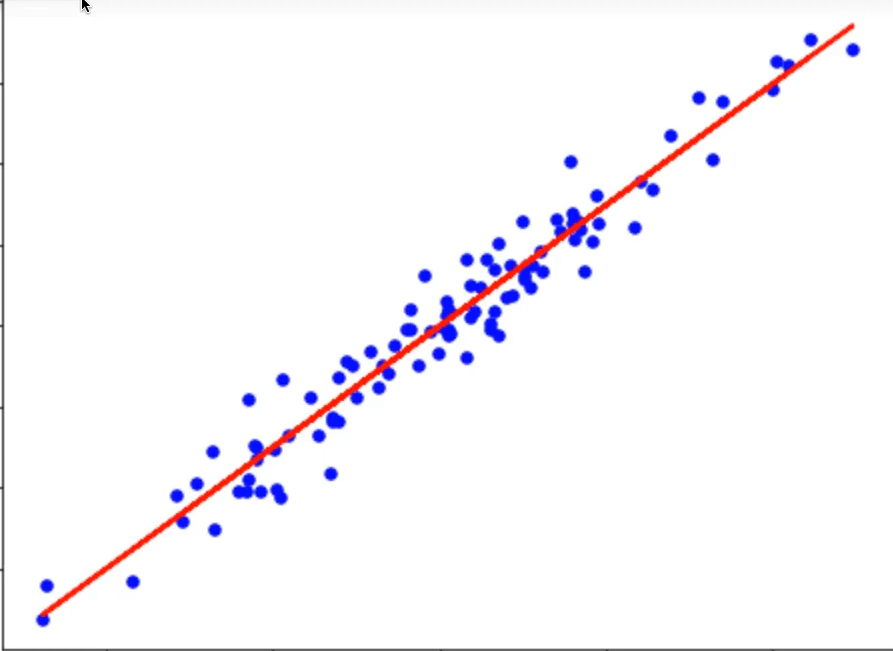

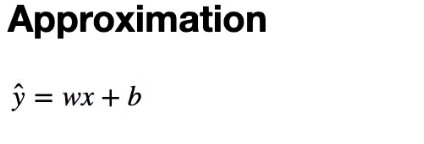

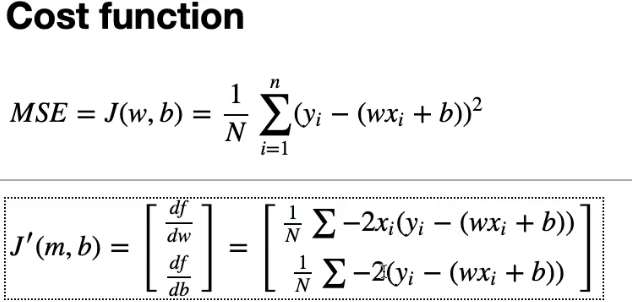

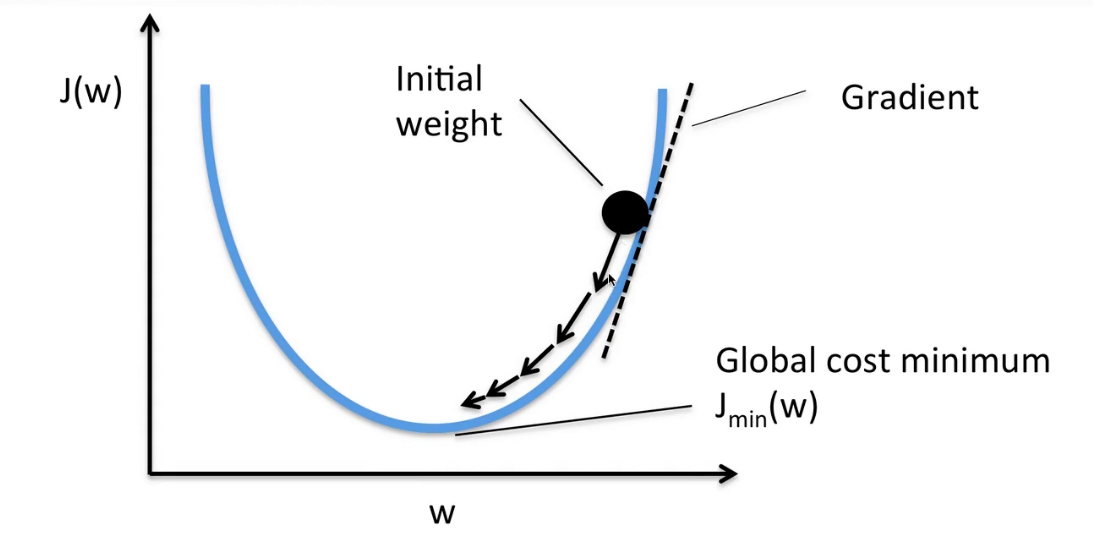

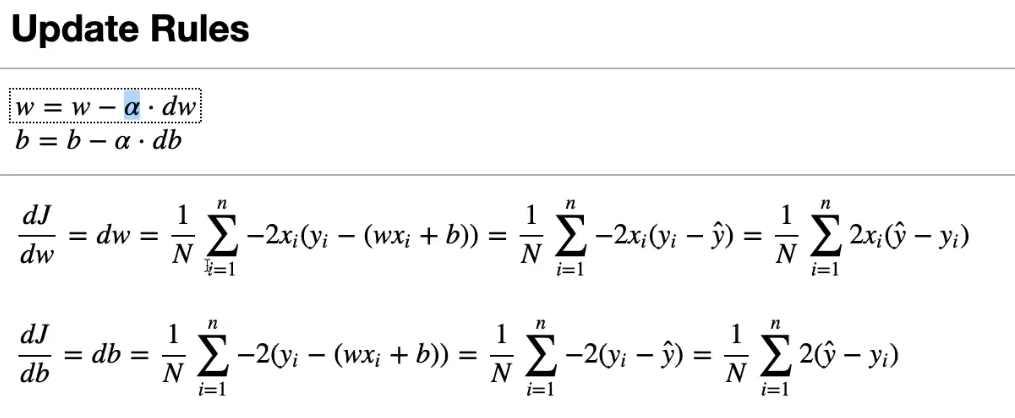

# Learning rate

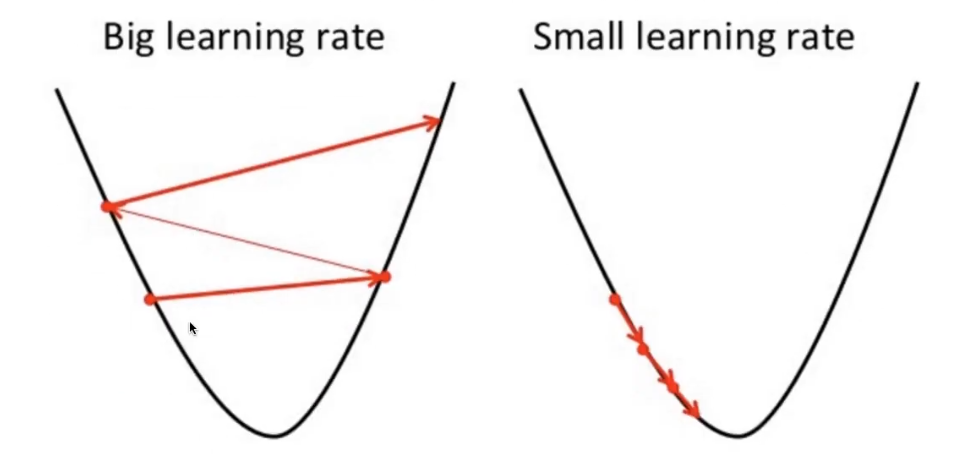

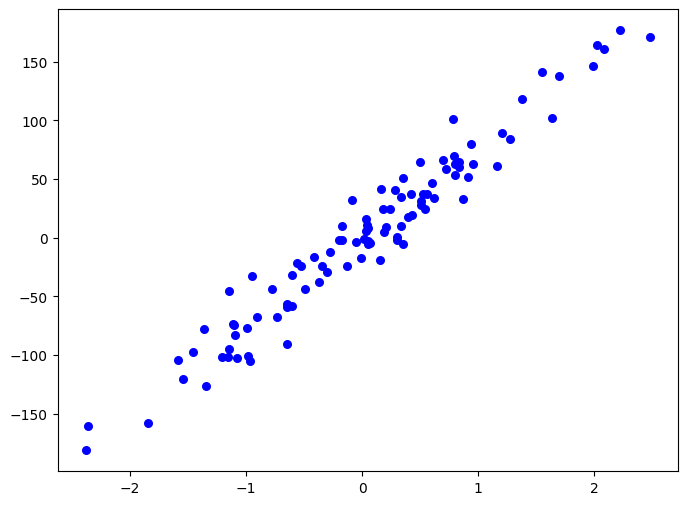

(80, 1)
(80,)


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
"""
We’re making some pretend data here.

n_samples=100: We’re making 100 data points.

n_features=1: Each data point has one feature, which is like one piece of information.

noise=20: We add some "noise" to make the data a bit messy, like when you scribble on a page.

random_state=4: This makes sure we get the same data every time we run the code (so it’s not too random).

X: This holds our input data (the feature).

y: This holds our output data (the result we’re trying to predict).

"""

X,y = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=4)

"""
We split our data into two parts:

X_train and y_train: This is the part the computer will learn from.

X_test and y_test: This is the part we’ll use to test if the computer learned well.

test_size=0.2: We save 20% of the data for testing and use the other 80% for learning.

random_state=1234: Again, this helps us get the same split every time.

"""

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1234)
"""
X_train: This is the input data (features) used for training. It’s 80% of the data.

y_train: These are the results (labels) that go with X_train.

X_test: This is the input data used for testing. It’s the other 20% of the data.

y_test: These are the results (labels) that go with X_test

"""

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0],y,color = "b",marker="o",s=30)
plt.show()

"""
Why Are the Shapes Different?
X_train has two dimensions:

One dimension for the number of data points (80 rows).
Another dimension for the number of features per data point (1 column).
y_train has only one dimension because each data point has just one result or label,
so it doesn’t need a second dimension. It’s just a list of numbers (or labels).

"""
print(X_train.shape)
print(y_train.shape)

In [5]:
class LinearRegression:
    def __init__(self,lr=0.001,n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self,X,y):
        # init parameters
        n_samples,n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_predicted = np.dot(X,self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T,(y_predicted - y))

            db = (1/n_samples) * np.sum(y_predicted-y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db


    def predict(self,X):
        y_predicted = np.dot(X,self.weights) + self.bias
        return y_predicted

In [10]:
regressor = LinearRegression(lr=0.01)
regressor.fit(X_train,y_train)
predicted = regressor.predict(X_test)

In [11]:
def mse(y_true,y_predicted):
    return np.mean((y_true - y_predicted)**2)


In [12]:
mse_value = mse(y_test,predicted)
print(mse_value)

305.7719958301902


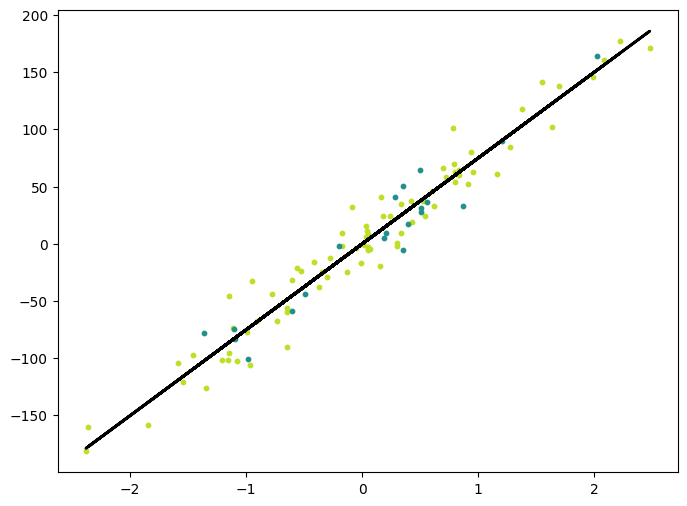

In [13]:
y_predicted_line = regressor.predict(X)
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train,y_train,color=cmap(0.9),s=10)
m2 = plt.scatter(X_test,y_test,color=cmap(0.5),s=10)
plt.plot(X,y_predicted_line,color='black',linewidth=2,label="Prediction")
plt.show()